In [36]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics
import statsmodels.formula.api as smf
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train = pd.read_csv('train_export.csv')
test = pd.read_csv('test_export.csv')

In [37]:
train.head()

,campaign_id,total_links,no_of_internal_links,no_of_images,no_of_sections,id,user_id,is_open,is_click,no_of_emails,cumulative_count,day_of_week,hour_of_day,000,2017,50,ahead,allen,anand,and,artificial,at,attend,av,before,bhu,big,bird,booz,borne,boss,business,by,can,ceo,chance,chat,chief,churn,click,codefest,coming,competitions,conference,convince,cross,data,datahack,day,days,delhi,dhs2017,dj,dr,early,emerging,ends,exciting,expert,expires,fireside,former,go,gramener,grow,hackathon,hackathons,hamilton,iit,in,india,innovate,inr,intelligence,join,july,just,keynote,kirk,lacs,largest,last,learning,live,look,machine,meetups,month,more,much,ncr,new,newsletter,non,now,october,of,offer,on,participate,passes,patil,peek,prediction,prizes,programmers,reasons,register,roles,save,science,scientist,sell,september,should,sneak,spot,starts,summit,the,through,to,today,tonight,upto,us,visualizing,watch,way,webinar,webinars,why,win,with,world,worth,you,your
0,29,67,61,12,3,29_185580,185580,0,0,4,0,5,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.284982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.238297,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0,0.364326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0
1,29,67,61,12,3,29_103665,103665,0,0,6,0,5,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.284982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.238297,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0,0.364326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0
2,29,67,61,12,3,29_219721,219721,0,0,6,0,5,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.284982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.238297,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0,0.364326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0
3,29,67,61,12,3,29_164941,164941,0,0,6,0,5,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.284982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.238297,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0,0.364326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0
4,29,67,61,12,3,29_159970,159970,0,0,3,0,5,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.284982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.238297,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0,0.364326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369229,0.0,0.0,0.0


In [38]:
train.is_click.value_counts()

0    751866
1      9791
Name: is_click, dtype: int64

In [39]:
test.is_click.value_counts()

0    258543
1      2991
Name: is_click, dtype: int64

In [40]:
X_train = train.drop(['is_click','is_open'], axis = 1)
y_train = train['is_click']
X_test = test.drop(['is_click','is_open'], axis = 1)
y_test = test['is_click']

classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')
classifier=classifier.fit(X_train, y_train)
predictions=classifier.predict(X_test)

In [41]:
X_test.head()

,campaign_id,total_links,no_of_internal_links,no_of_images,no_of_sections,id,user_id,no_of_emails,cumulative_count,day_of_week,hour_of_day,000,2017,50,ahead,allen,anand,and,artificial,at,attend,av,before,bhu,big,bird,booz,borne,boss,business,by,can,ceo,chance,chat,chief,churn,click,codefest,coming,competitions,conference,convince,cross,data,datahack,day,days,delhi,dhs2017,dj,dr,early,emerging,ends,exciting,expert,expires,fireside,former,go,gramener,grow,hackathon,hackathons,hamilton,iit,in,india,innovate,inr,intelligence,join,july,just,keynote,kirk,lacs,largest,last,learning,live,look,machine,meetups,month,more,much,ncr,new,newsletter,non,now,october,of,offer,on,participate,passes,patil,peek,prediction,prizes,programmers,reasons,register,roles,save,science,scientist,sell,september,should,sneak,spot,starts,summit,the,through,to,today,tonight,upto,us,visualizing,watch,way,webinar,webinars,why,win,with,world,worth,you,your
0,52,67,62,10,4,52_134438,134438,4,0,3,12,0.0,0.161967,0.0,0.0,0.0,0.0,0.190616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.213375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292956,0.2541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,52,67,62,10,4,52_65386,65386,7,0,3,12,0.0,0.161967,0.0,0.0,0.0,0.0,0.190616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.213375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292956,0.2541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52,67,62,10,4,52_32415,32415,5,0,3,13,0.0,0.161967,0.0,0.0,0.0,0.0,0.190616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.213375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292956,0.2541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52,67,62,10,4,52_66144,66144,6,0,3,12,0.0,0.161967,0.0,0.0,0.0,0.0,0.190616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.213375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292956,0.2541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52,67,62,10,4,52_6200,6200,8,0,3,12,0.0,0.161967,0.0,0.0,0.0,0.0,0.190616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.213375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292956,0.2541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[258543,      0],
       [  2991,      0]], dtype=int64)

In [43]:
sklearn.metrics.accuracy_score(y_test, predictions)

0.98856362843836743

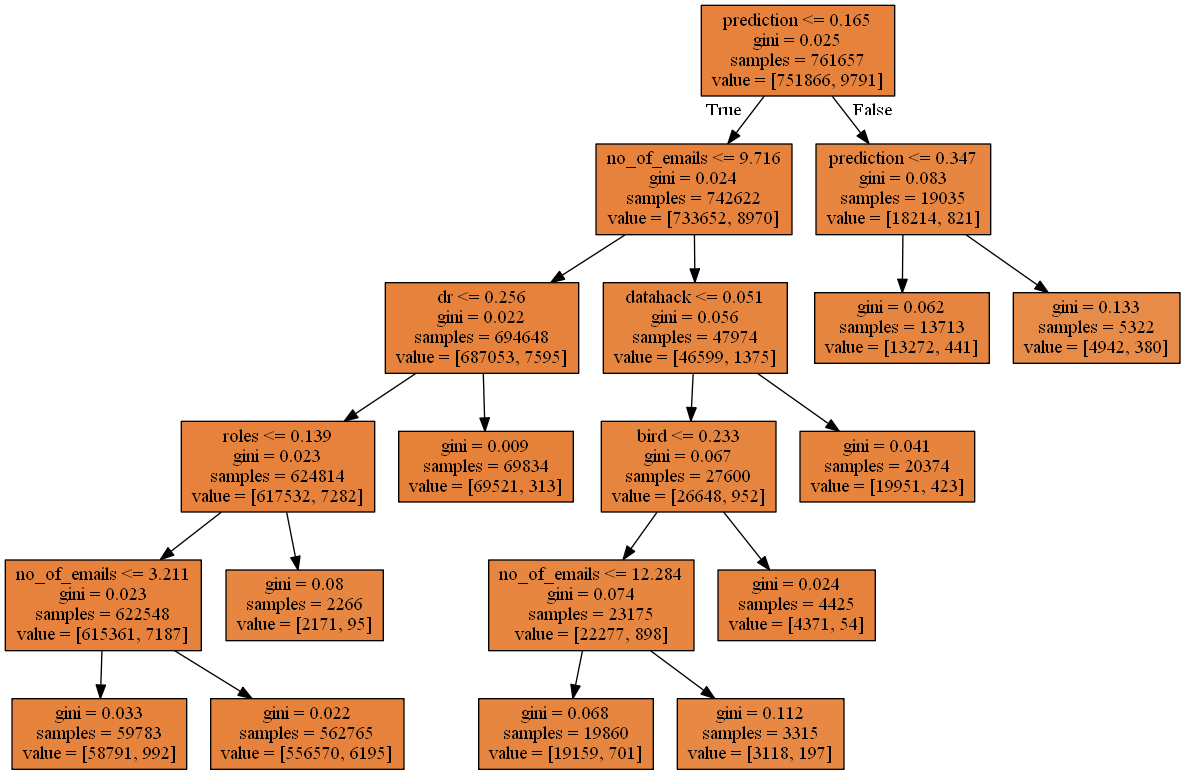

In [44]:
#Displaying the decision tree
from sklearn import tree
#from StringIO import StringIO
from io import StringIO
#from StringIO import StringIO 
from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, out_file=out,feature_names = list(X_test.columns), filled = True)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())